In [1]:
import sys
sys.path.append('../')

from utilidades import *
import warnings
warnings.filterwarnings('ignore')

<h2><b>DADOS</b></h2>

In [2]:
# Fazendo o load das embeddings do TJRN
emb_TJRN_BERT = np.load('Embeddings/TJRN_MBERT.npy')
emb_TJRN_TFIDF = np.load('Embeddings/TJRN_TFIDF.npy')

# Criando as labels para TJRN
# OBS: os 30000 textos estão bem divididos, isso significa que os primeiros 3000 textos pertencem a primeira classe,
# os 3000 textos seguintes pertencem a segunda classe e assim por diante.
aux_list = ['196', '198', '200', '219', '220', '339', '458', '461', '463', '785']
TJRN_labels = [[classe]*3000 for classe in aux_list]
TJRN_labels = np.concatenate(TJRN_labels, axis=None)

# Fazendo o load das embeddings do 20Newsgroups
obj_NG_BERT = np.load('Embeddings/NG_BERT.npy', allow_pickle=True) # Permite fazer o load de objetos (sparce matrix, nesse caso)
obj_NG_TFIDF = np.load('Embeddings/NG_TFIDF.npy', allow_pickle=True)

# Separando as embeddings e as labels
emb_NG_BERT = obj_NG_BERT.item().get('data')
emb_NG_TFIDF = np.array(obj_NG_TFIDF.item().get('data'))
NG_labels = obj_NG_BERT.item().get('target')

print(f"Shape TJRN_BERT: {emb_TJRN_BERT.shape}\nShape TJRN_TFIDF: {emb_TJRN_TFIDF.shape}\nShape TJRN_labels: {TJRN_labels.shape}\n")
print(f"Shape NG_BERT: {emb_NG_BERT.shape}\nShape NG_TFIDF: {emb_NG_TFIDF.shape}\nShape NG_labels: {NG_labels.shape}")

Shape TJRN_BERT: (30000, 768)
Shape TJRN_TFIDF: (30000, 1446)
Shape TJRN_labels: (30000,)

Shape NG_BERT: (18846, 768)
Shape NG_TFIDF: (18846, 1352)
Shape NG_labels: (18846,)


<h2><b>PEGANDO PARTE DOS DADOS</b></h2>

Para evitar trabalhar com todos os textos vamos pegar apenas alguns:
<li>300 textos de cada classe do TJRN</li>
<li>Os textos das classes 'comp.windows.x', 'rec.sport.baseball' e 'talk.politics.misc'</li>

<h3>TJRN</h3>

In [3]:
# Vamos utilizar o train_test_split para fazer uma divisão correta dos dados do TJRN
from sklearn.model_selection import train_test_split

emb_TJRN_BERT, _, _, _ = train_test_split(emb_TJRN_BERT, TJRN_labels, train_size=0.1, random_state=42, stratify=TJRN_labels)
emb_TJRN_TFIDF, _, TJRN_labels, _ = train_test_split(emb_TJRN_TFIDF, TJRN_labels, train_size=0.1, random_state=42, stratify=TJRN_labels)

<h3>20Newsgroups</h3>

comp.windows.x -> classe 5

rec.sport.baseball -> classe 9

talk.politics.misc -> classe 18

In [4]:
# Encontrando os índices das classes selecionadas
index = np.where(np.isin(NG_labels, [5, 9, 18]))

# Selecionando apenas os textos das classes selecionadas
emb_NG_BERT = emb_NG_BERT[index]
emb_NG_TFIDF = emb_NG_TFIDF[index]
NG_labels = NG_labels[index]

# Vamos utilizar o train_test_split para fazer uma divisão correta dos dados do NG
emb_NG_BERT, _, _, _ = train_test_split(emb_NG_BERT, NG_labels, train_size=0.33, random_state=42, stratify=NG_labels)
emb_NG_TFIDF, _, NG_labels, _ = train_test_split(emb_NG_TFIDF, NG_labels, train_size=0.33, random_state=42, stratify=NG_labels)

In [5]:
print(f"Shape TJRN_BERT: {emb_TJRN_BERT.shape}\nShape TJRN_TFIDF: {emb_TJRN_TFIDF.shape}\nShape TJRN_labels: {TJRN_labels.shape}\n")
print(f"Shape NG_BERT: {emb_NG_BERT.shape}\nShape NG_TFIDF: {emb_NG_TFIDF.shape}\nShape NG_labels: {NG_labels.shape}")

Shape TJRN_BERT: (3000, 768)
Shape TJRN_TFIDF: (3000, 1446)
Shape TJRN_labels: (3000,)

Shape NG_BERT: (909, 768)
Shape NG_TFIDF: (909, 1352)
Shape NG_labels: (909,)


In [6]:
NG_target_names = np.unique(NG_labels)
TJRN_target_names = np.unique(TJRN_labels)

# DBSCAN


<h3>Redução de dimensionalidade</h3>

In [7]:
from sklearn.manifold import TSNE

X_emb_TJRN_TFIDF = TSNE().fit_transform(emb_TJRN_TFIDF)
X_emb_TJRN_BERT = TSNE().fit_transform(emb_TJRN_BERT)

X_emb_NG_TFIDF = TSNE().fit_transform(emb_NG_TFIDF)
X_emb_NG_BERT = TSNE().fit_transform(emb_NG_BERT)

<h3>Clusterização</h3>

In [52]:
from sklearn.cluster import DBSCAN

# O método fit_predict faz a "fitagem" dos dados e já retorna os clusters a qual cada dado pertence

db_labels_TJRN_TFIDF = DBSCAN(eps=0.8, min_samples=5).fit_predict(emb_TJRN_TFIDF)
db_labels_TJRN_BERT = DBSCAN(eps=0.5, min_samples=5).fit_predict(emb_TJRN_BERT)

db_labels_NG_TFIDF = DBSCAN(eps=0.5, min_samples=5).fit_predict(emb_NG_TFIDF)
db_labels_NG_BERT = DBSCAN(eps=0.5, min_samples=5).fit_predict(emb_NG_BERT)

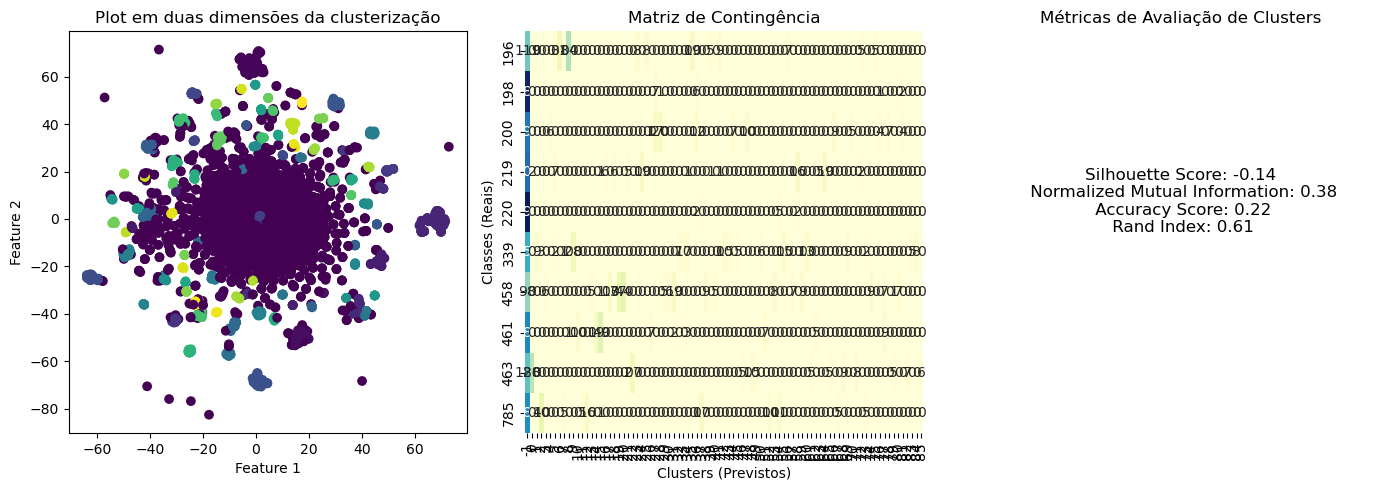

In [53]:
# TJRN TFIDF

plot_cluster_evaluation(X_emb_TJRN_TFIDF, TJRN_labels, db_labels_TJRN_TFIDF, TJRN_target_names)

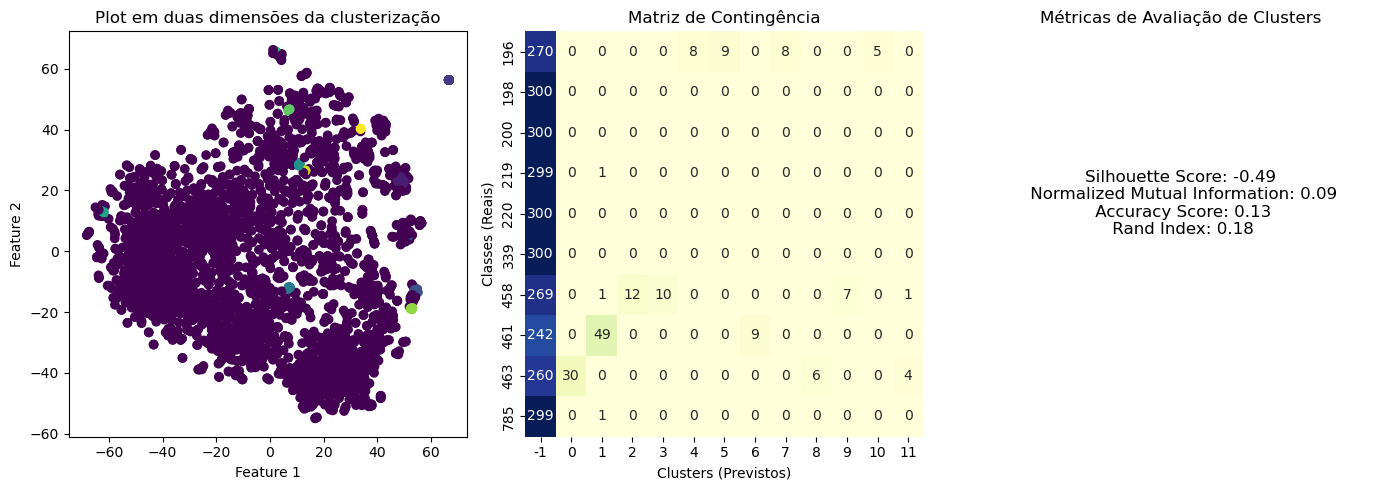

In [54]:
# TJRN BERT

plot_cluster_evaluation(X_emb_TJRN_BERT, TJRN_labels, db_labels_TJRN_BERT, TJRN_target_names)

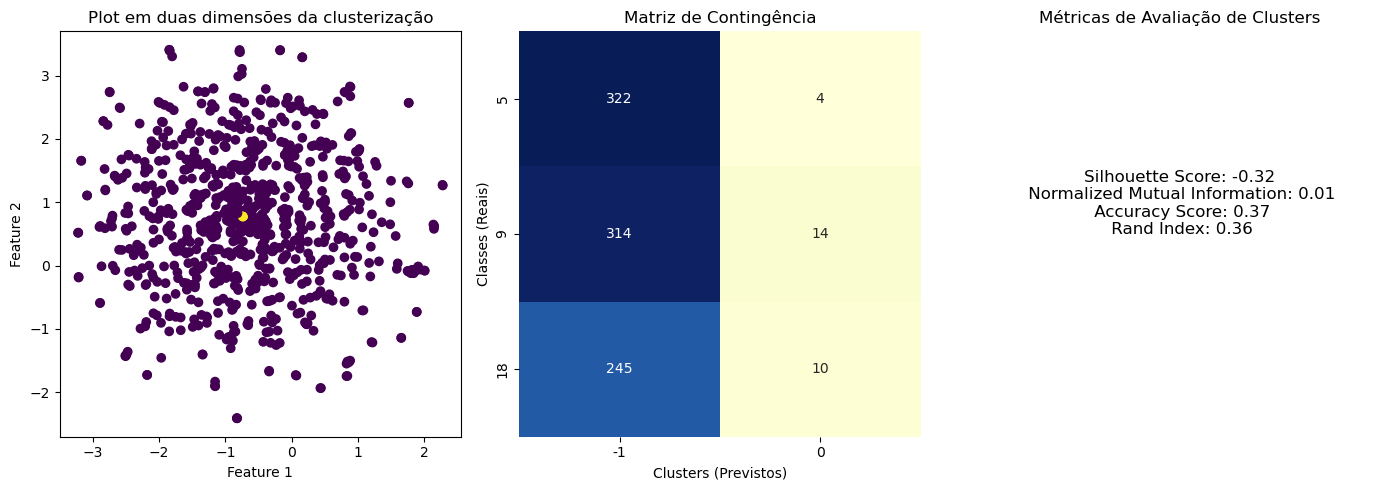

In [55]:
# NG TFIDF

plot_cluster_evaluation(X_emb_NG_TFIDF, NG_labels, db_labels_NG_TFIDF, NG_target_names)

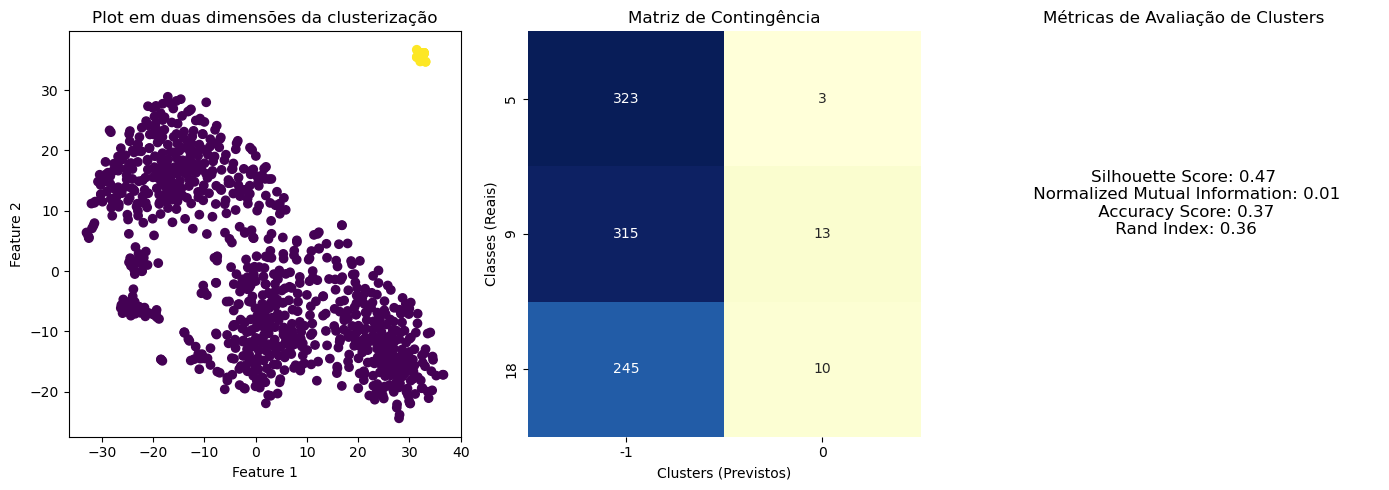

In [56]:
# NG BERT

plot_cluster_evaluation(X_emb_NG_BERT, NG_labels, db_labels_NG_BERT, NG_target_names)